<a href="https://colab.research.google.com/github/daniel-nuno/time_series_O2024_MAF3074N/blob/main/pronosticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

<br>
<br>
Clase: Series de tiempo
<br>
Actividad: Pronósticos
<br>
<br>

* * *
Abdon Islas <br>
Fecha: 2 de septiembre 2024 <br>

* * *

<br>
<br>

Some forecasting methods are extremely simple and surprisingly effective.

- Mean
- Naive
- Seasonal Naive
- Drift

# Pronósticos simples
Utliza statsforecast https://nixtlaverse.nixtla.io/statsforecast/index.html

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf

In [16]:
stock = "NVDA"
ticker = yf.Ticker(stock)
data = ticker.history(start = "2013-01-01", end = "2023-12-31", interval = "1mo")["Close"]

data.index = pd.to_datetime(data.index)

data = pd.Series(data = data.values, index=data.index) # Use data.values, not data.Value

In [ ]:
type(data)

pandas.core.series.Series

In [66]:
data.head()

,0
Date,
2013-01-01 00:00:00-05:00,0.282944
2013-02-01 00:00:00-05:00,0.292175
2013-03-01 00:00:00-05:00,0.297915
2013-04-01 00:00:00-04:00,0.319742
2013-05-01 00:00:00-04:00,0.335996


## Mean

Here, the forecasts of all future values are equal to the average (or “mean”) of the historical data. If we let the historical data be denoted by $y_{1},...,y_{T}$, then we can write the forecasts as

\begin{gather*}
\hat{y}_{T+h|T}=\bar{y}=(y_{1}+⋯+y_{T})/T
\end{gather*}

The notation $\hat{y}_{T+h|T}$ is a short-hand for the estimate of $y_{T+h}$ based on the data $y_{1},...,y_{T}$

In [67]:
pip install statsforecast

In [80]:
# HistoricAverage's usage example:
from statsforecast.models import HistoricAverage

# Create an array with the observed values in Bricks:
y_mean = data.values

# Define the model, fit and predict:
model = HistoricAverage()
model = model.fit(y=y_mean)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([9.353348, 9.353348, 9.353348], dtype=float32)}

In [81]:
pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01'], dtype='datetime64[ns]', freq=None)

In [82]:
# Specify the quarters predicted:
months_pred = pd.to_datetime(['2024-01-01', '2024-02-01', '2024-03-01'])

# Create a dataframe with the quarters and values predicted:
Y_pred_df = pd.DataFrame({'mean_forecast':y_hat_dict["mean"]}, index = months_pred)

In [83]:
Y_pred_df

,mean_forecast
2024-01-01,9.353348
2024-02-01,9.353348
2024-03-01,9.353348


In [84]:
pd.concat([data, Y_pred_df])

,0,mean_forecast
2013-01-01 00:00:00-05:00,0.282944,NaN
2013-02-01 00:00:00-05:00,0.292175,NaN
2013-03-01 00:00:00-05:00,0.297915,NaN
2013-04-01 00:00:00-04:00,0.319742,NaN
2013-05-01 00:00:00-04:00,0.335996,NaN
...,...,...
2023-11-01 00:00:00-04:00,46.759853,NaN
2023-12-01 00:00:00-05:00,49.511257,NaN
2024-01-01 00:00:00,NaN,9.353348
2024-02-01 00:00:00,NaN,9.353348


In [85]:
frame = pd.concat([data, Y_pred_df])
frame.columns = ['Values', 'mean_forecast']

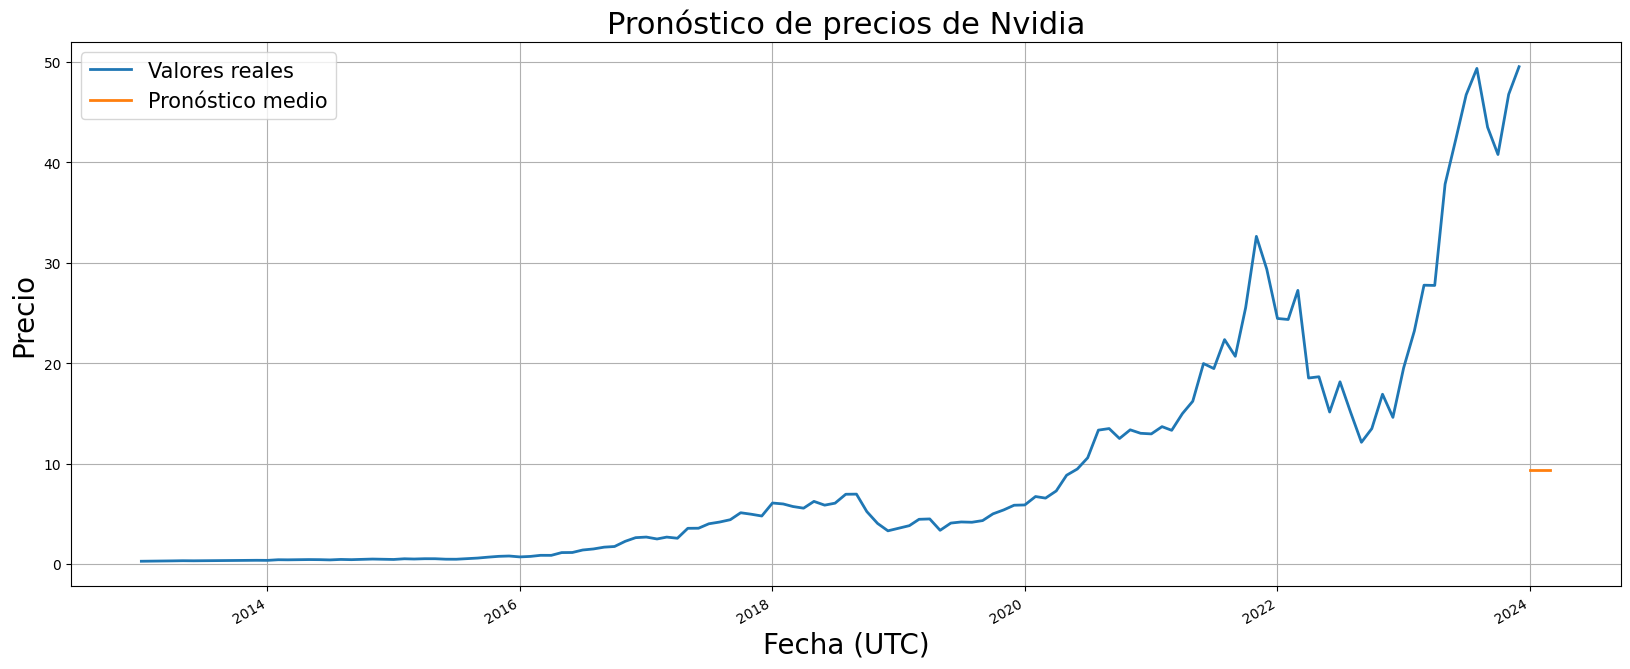

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2013-01-01 05:00:00+00:00', '2013-02-01 05:00:00+00:00',
               '2013-03-01 05:00:00+00:00', '2013-04-01 04:00:00+00:00',
               '2013-05-01 04:00:00+00:00', '2013-06-01 04:00:00+00:00',
               '2013-07-01 04:00:00+00:00', '2013-08-01 04:00:00+00:00',
               '2013-09-01 04:00:00+00:00', '2013-10-01 04:00:00+00:00',
               ...
               '2023-06-01 04:00:00+00:00', '2023-07-01 04:00:00+00:00',
               '2023-08-01 04:00:00+00:00', '2023-09-01 04:00:00+00:00',
               '2023-10-01 04:00:00+00:00', '2023-11-01 04:00:00+00:00',
               '2023-12-01 05:00:00+00:00', '2024-01-01 00:00:00+00:00',
               '2024-02-01 00:00:00+00:00', '2024-03-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=135, freq=None)


In [86]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))

plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast']

# Asegurarnos de Zona horaria UTC
def ensure_utc(dt):
    if dt.tzinfo is None:
        return pd.Timestamp(dt).tz_localize('UTC')
    return dt.astimezone('UTC')

plot_df.index = plot_df.index.map(ensure_utc)

plot_df[['Values', 'mean_forecast']].plot(ax=ax, linewidth=2)

ax.set_title('Pronóstico de precios de Nvidia', fontsize=22)
ax.set_ylabel('Precio', fontsize=20)
ax.set_xlabel('Fecha (UTC)', fontsize=20)
ax.legend(['Valores reales', 'Pronóstico medio'], prop={'size': 15})
ax.grid()

plt.show()

print(type(plot_df.index))
print(plot_df.index)


fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast']

# Ensure all timestamps are tz-aware (UTC)
def ensure_utc(dt):
    if dt.tzinfo is None:
        return pd.Timestamp(dt).tz_localize('UTC')
    return dt.astimezone('UTC')

plot_df.index = ensure_utc(plot_df.index)

# Plot the last 24 data points
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Pronóstico de precios de Nvidia', fontsize=22)
ax.set_ylabel('Precio', fontsize=20)
ax.set_xlabel('Fecha (UTC)', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

plt.show()

# Opcional: Imprimir información sobre el índice para depuración
print(type(plot_df.index))
print(plot_df.index)

## Naïve method

For naïve forecasts, we simply set all forecasts to be the value of the last observation. That is,

\begin{gather*}
\hat{y}_{T+h|T}=y_{T}
\end{gather*}

This method works remarkably well for many economic and financial time series.

In [87]:
# Naive's usage example:
from statsforecast.models import Naive

# Define the model, fit and predict:
model = Naive()
model = model.fit(y=data.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([49.511257, 49.511257, 49.511257], dtype=float32)}

In [88]:
# Create a column with the values predicted:
Y_pred_df["naive_forecast"] = y_hat_dict["mean"]

In [89]:
Y_pred_df

,mean_forecast,naive_forecast
2024-01-01,9.353348,49.511257
2024-02-01,9.353348,49.511257
2024-03-01,9.353348,49.511257


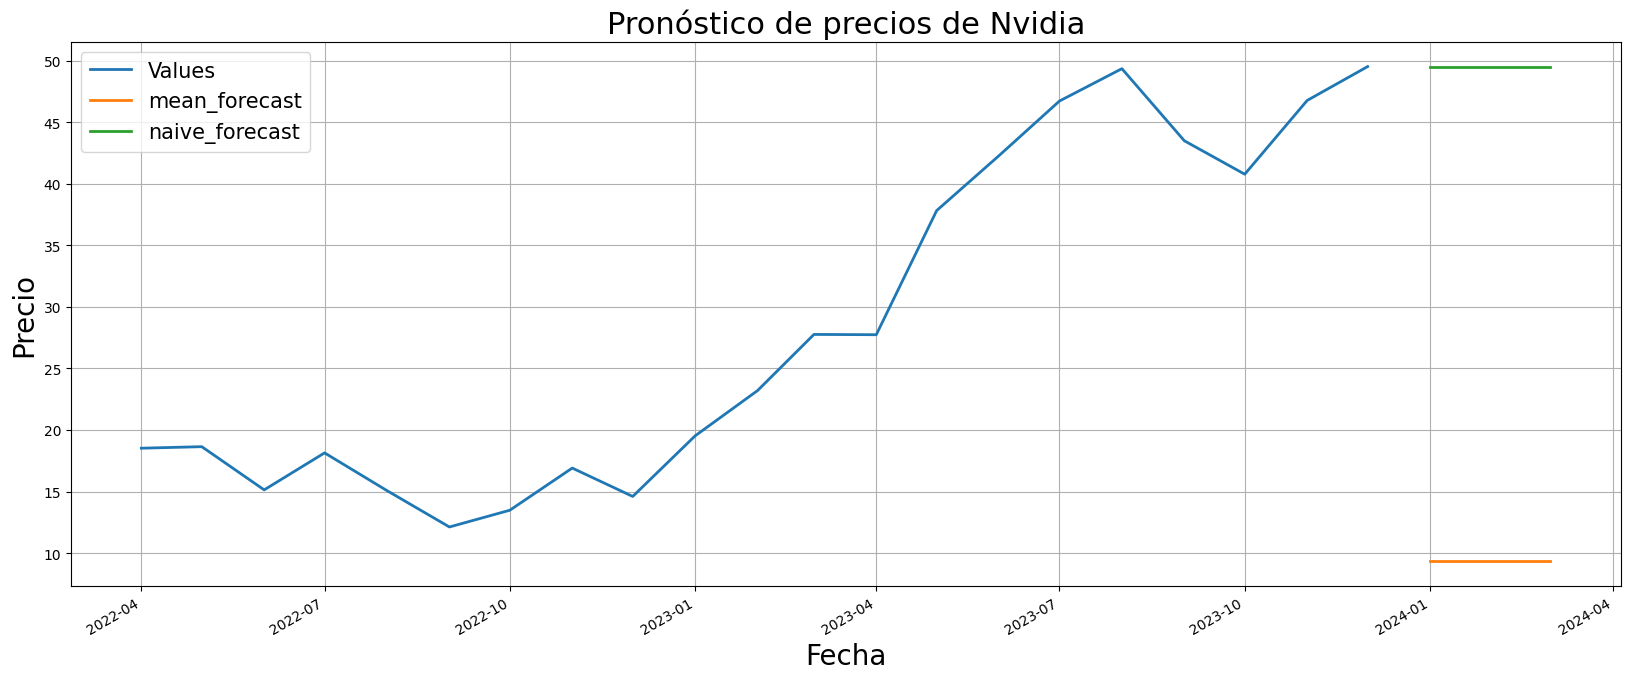

Tipo de índice: <class 'pandas.core.indexes.base.Index'>
Muestra del índice: Index([2013-01-01 00:00:00-05:00, 2013-02-01 00:00:00-05:00,
       2013-03-01 00:00:00-05:00, 2013-04-01 00:00:00-04:00,
       2013-05-01 00:00:00-04:00],
      dtype='object')


In [90]:
def ensure_tz_consistent(df):
    if df.index.tz is None:
        return df.tz_localize('UTC')
    return df

# Asegurar que tanto 'data' como 'Y_pred_df' tengan índices consistentes
data = ensure_tz_consistent(data)
Y_pred_df = ensure_tz_consistent(Y_pred_df)

fig, ax = plt.subplots(1, 1, figsize=(20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast']

# Plot the last 24 data points
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Pronóstico de precios de Nvidia', fontsize=22)
ax.set_ylabel('Precio', fontsize=20)
ax.set_xlabel('Fecha', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

plt.show()

# Opcional: Imprimir información sobre el índice para depuración
print("Tipo de índice:", type(plot_df.index))
print("Muestra del índice:", plot_df.index[:5])


Because a naïve forecast is optimal when data follow a random walk, these are also called random walk forecasts and the random walk model can be used instead of `NAIVE`.

## Seasonal naïve method

A similar method is useful for highly seasonal data. In this case, we set each forecast to be equal to the last observed value from the same season (e.g., the same month of the previous year). Formally, the forecast for time  $T+h$ is written as

\begin{gather*}
\hat{y}_{T+h|T}=y_{T+h-m(k+1)}
\end{gather*}

where $m=$ the seasonal period, and $k$ is the integer part of  $(h−1)/m$ (i.e., the number of complete years in the forecast period prior to time $T+h)$. This looks more complicated than it really is. For example, with monthly data, the forecast for all future February values is equal to the last observed February value. With quarterly data, the forecast of all future Q2 values is equal to the last observed Q2 value (where Q2 means the second quarter). Similar rules apply for other months and quarters, and for other seasonal periods.

In [91]:
# SeasonalNaive's usage example:
from statsforecast.models import SeasonalNaive

# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=data.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([19.525814, 23.20271 , 27.761099], dtype=float32)}

In [92]:
# Create a column with the values predicted:
Y_pred_df["seasonal_naive_forecast"] = y_hat_dict["mean"]

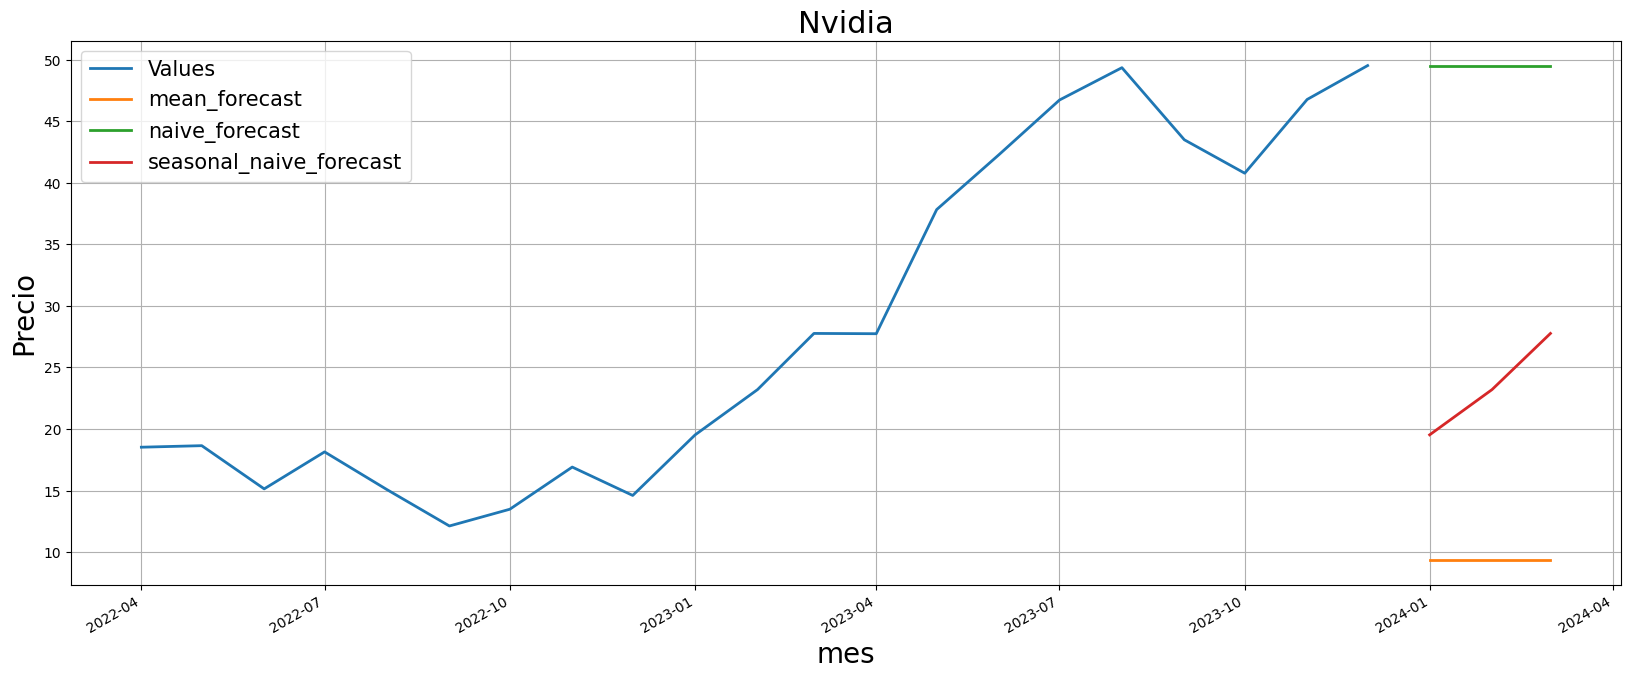

In [93]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Nvidia', fontsize=22)
ax.set_ylabel('Precio', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

## Drift method

A variation on the naïve method is to allow the forecasts to increase or decrease over time, where the amount of change over time (called the drift) is set to be the average change seen in the historical data. Thus the forecast for time $T+h$ is given by

\begin{gather*}
\hat{y}_{T+h|T}=y_{T}+\frac{h}{T-1}\sum_{t=2}^{T}(y_{t}-y_{t-1})=y_{T}+h\frac{y_{T}-y_{1}}{T-1}
\end{gather*}

This is equivalent to drawing a line between the first and last observations, and extrapolating it into the future.

In [94]:
# RandomWalkWithDrift's usage example:
from statsforecast.models import RandomWalkWithDrift

# Define the model, fit and predict:
model = RandomWalkWithDrift()
model = model.fit(y=data.values)
y_hat_dict = model.predict(h=3)

y_hat_dict

{'mean': array([49.887047, 50.262833, 50.638622], dtype=float32)}

In [95]:
# Create a column with the values predicted:
Y_pred_df["drift_forecast"] = y_hat_dict["mean"]

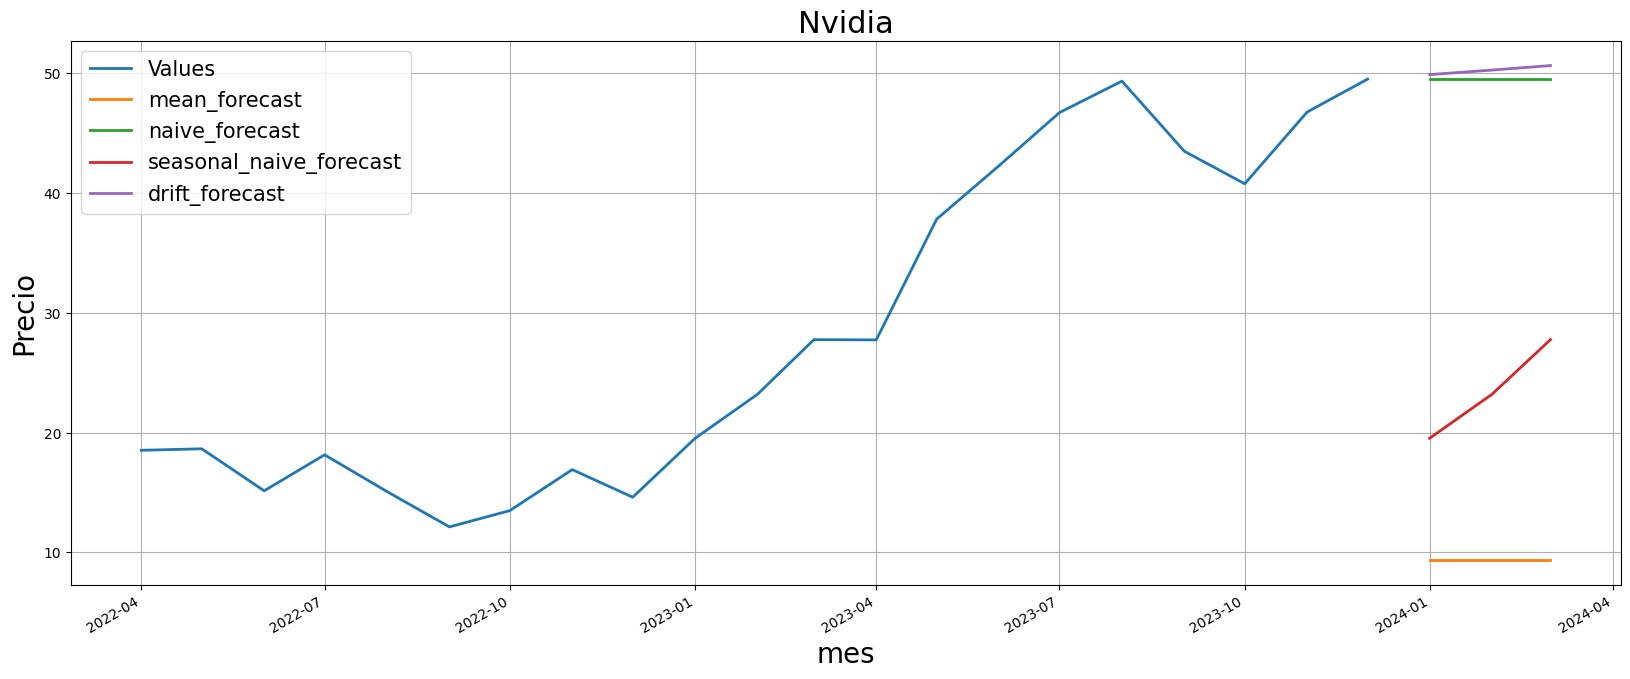

In [96]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

# Concatenate the dataframe of predicted values with the dataframe of observed values:
plot_df = pd.concat([data, Y_pred_df])
plot_df.columns = ['Values', 'mean_forecast', 'naive_forecast', 'seasonal_naive_forecast', 'drift_forecast']
plot_df[-24:].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title('Nvidia', fontsize=22)
ax.set_ylabel('Precio', fontsize=20)
ax.set_xlabel('mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

Analizando los metodos, vemos que el metodo mean esta muy por abajo por tomar en cuenta todos los valores anteriores, que en años pasados son muy bajos, el seasonal naive es mas optimista ya que vemos un crecimiento significativo cada año, el naive es mas realista a lo que tenemos ahora y el drift me convence mas por que marca la tendencia de Nvidia

## Valores ajustados y residuales

Each observation in a time series can be forecast using all previous observations. We call these fitted values and they are denoted by $\hat{y}_{t|t-1}$, meaning the forecast of $y_{t}$ based on observations $y_{,},...,y_{t-1}$ .

For example, if we use the mean method, the **fitted** values are given by:

\begin{gather*}
\hat{y}_{t}=\hat{c}
\end{gather*}

The **residuals** in a time series model are what is left over after fitting a model. The residuals are equal to the difference between the observations and the corresponding fitted values:

\begin{gather*}
e_{t}=y_{t}-\hat{y}_{t*}
\end{gather*}

The fitted values and residuals from a model can be obtained using the augment() function.

In [97]:
#Import the libraries that we are going to use for the analysis:
import pandas as pd
import numpy as np

from statsforecast import StatsForecast
from statsforecast.models import __all__
from statsforecast.models import HistoricAverage

In [ ]:
# Create a dataframe from a csv file:
#"/content/drive/MyDrive/series_tiempo/Assets/remesas banxico.xlsx"
df = pd.read_csv("/content/drive/MyDrive/series_tiempo/Assets/aus-production.csv", sep=";")

# Create a dataframe with beer production:
beer = df[["Quarter","Beer"]]

#Inferior limit:
beer_mask=beer['Quarter']>="1992 Q1"
filtered_beer = beer[beer_mask]

#Superior limit:
beer_mask=filtered_beer['Quarter']<="2006 Q4"
beer = filtered_beer[beer_mask]

# Create an array with the observed values
y_beer = beer["Beer"].values

# Mean method:
model = HistoricAverage()
model = model.fit(y=y_beer)
mean = model.predict(h=14)

In [99]:


def augment(model_name, time_var, obs_values):

    type_model_list = []
    for n in range(len(obs_values)):
        type_model_list.append(model_name)
        n += 1
    fitted_values = model.predict_in_sample()
    residuals = obs_values - fitted_values["fitted"]

    augment_df = pd.DataFrame({'model':type_model_list,
                        'time_var':time_var,
                        'obs_values':obs_values,
                        'fitted_values':fitted_values["fitted"],
                        'residuals':residuals})

    return(augment_df)

In [100]:
# augment(model_name, time_var, obs_values)
augment_df = augment("Mean",beer["Quarter"],beer["Beer"])

augment_df.tail()

NameError: name 'beer' is not defined

### Residual diagnostics
***
A good forecasting method will yield innovation residuals with the following properties:

1. The innovation residuals are uncorrelated. If there are correlations between innovation residuals, then there is information left in the residuals which should be used in computing forecasts.
2. The innovation residuals have zero mean. If they have a mean other than zero, then the forecasts are biased.
3. The innovation residuals have constant variance. This is known as “homoscedasticity”.
4. The innovation residuals are normally distributed.


Any forecasting method that does not satisfy these properties can be improved, specially 1 and 2.

3 and 4 properties make the calculation of prediction intervals easier (see Section 5 for an example). However, a forecasting method that does not satisfy these properties cannot necessarily be improved. Sometimes applying a Box-Cox transformation may assist with these properties, but otherwise there is usually little that you can do to ensure that your innovation residuals have constant variance and a normal distribution.

In [101]:
# Define the model, fit and predict:
model = SeasonalNaive(season_length=12)
model = model.fit(y=data.values)
mean = model.predict(h=12)

In [102]:
# augment(model_name, time_var, obs_values)
augment_df = augment("Mean",data.index,data)

In [103]:
augment_df

,model,time_var,obs_values,fitted_values,residuals
Date,,,,,
2013-01-01 00:00:00-05:00,Mean,2013-01-01 00:00:00-05:00,0.282944,NaN,NaN
2013-02-01 00:00:00-05:00,Mean,2013-02-01 00:00:00-05:00,0.292175,NaN,NaN
2013-03-01 00:00:00-05:00,Mean,2013-03-01 00:00:00-05:00,0.297915,NaN,NaN
2013-04-01 00:00:00-04:00,Mean,2013-04-01 00:00:00-04:00,0.319742,NaN,NaN
2013-05-01 00:00:00-04:00,Mean,2013-05-01 00:00:00-04:00,0.335996,NaN,NaN
...,...,...,...,...,...
2023-08-01 00:00:00-04:00,Mean,2023-08-01 00:00:00-04:00,49.340225,15.077022,34.263204
2023-09-01 00:00:00-04:00,Mean,2023-09-01 00:00:00-04:00,43.485977,12.125345,31.360632
2023-10-01 00:00:00-04:00,Mean,2023-10-01 00:00:00-04:00,40.771152,13.485824,27.285329


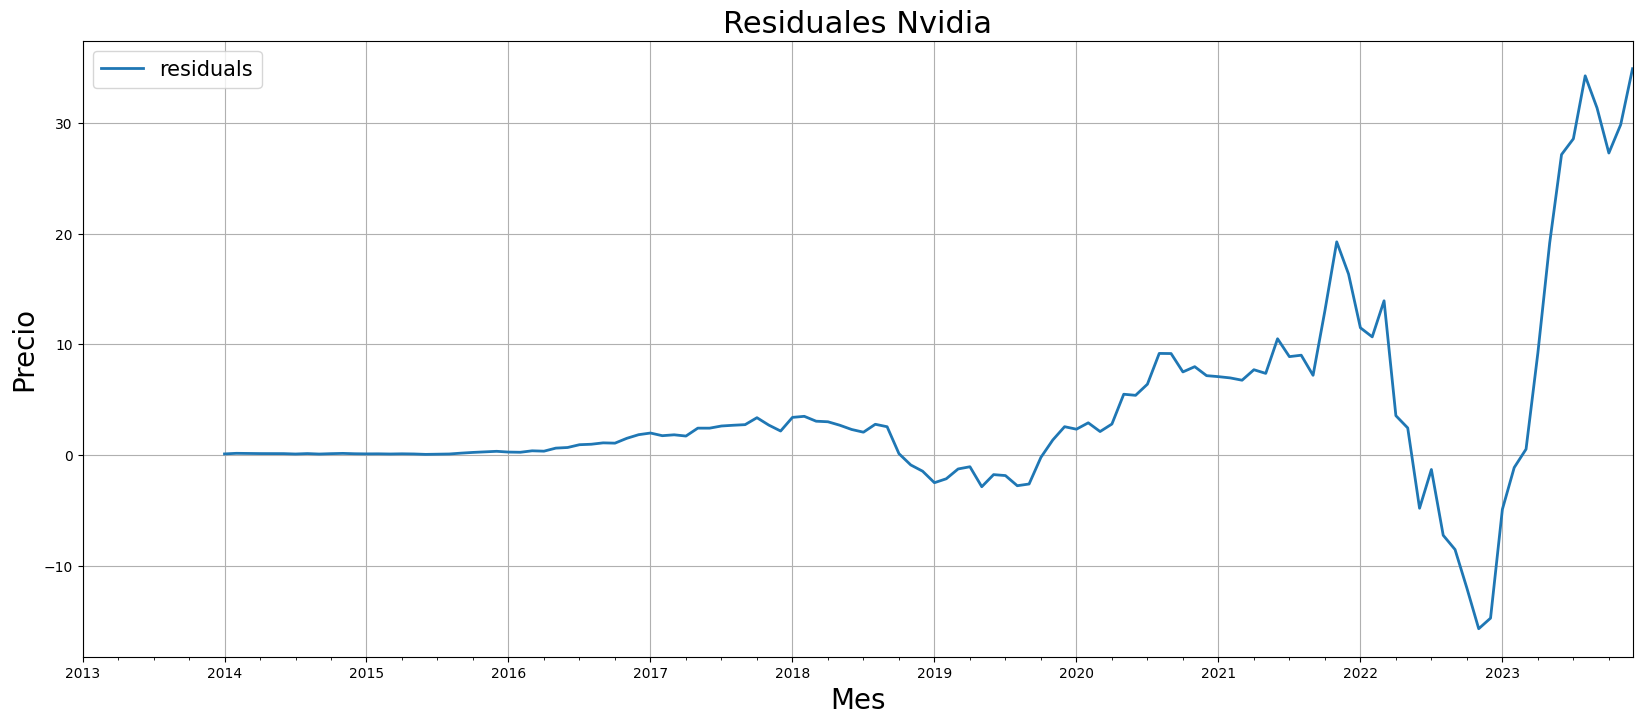

In [107]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))
augment_df['residuals'].plot(ax=ax, linewidth=2)

# Specify graph features:
ax.set_title("Residuales Nvidia", fontsize=22)
ax.set_ylabel('Precio', fontsize=20)
ax.set_xlabel('Mes', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

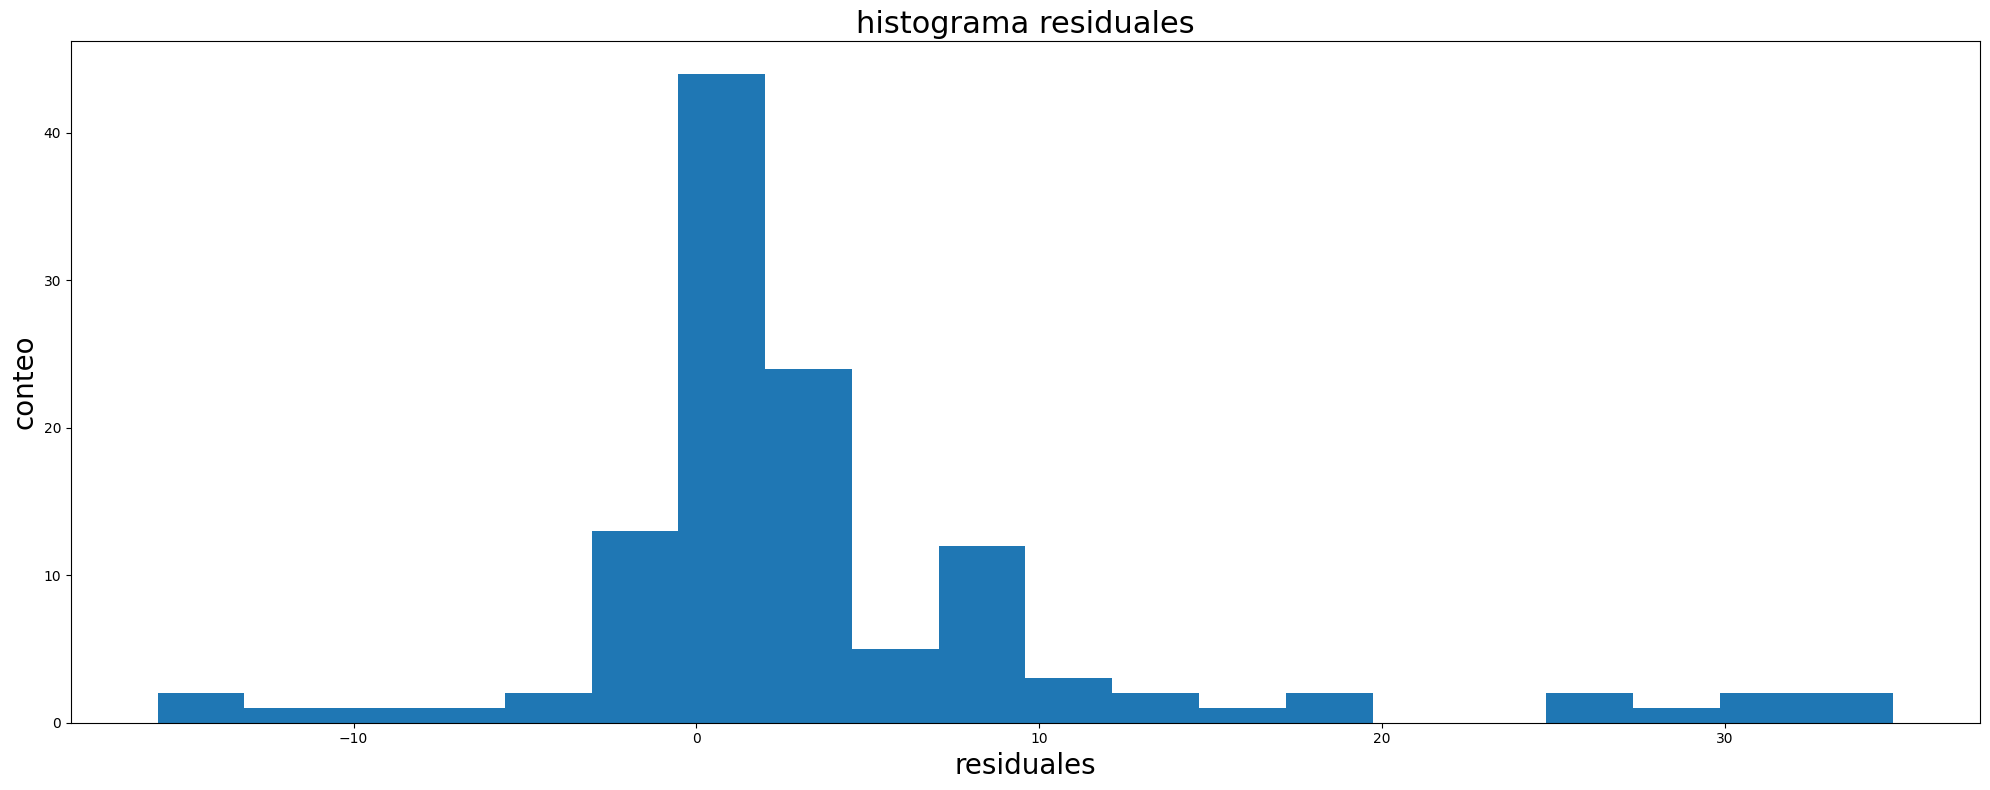

In [108]:
# Creating histogram
fig, axs = plt.subplots(1, 1,
                        figsize =(20, 8),
                        tight_layout = True)

axs.hist(augment_df["residuals"], bins = 20)

# Specify graph features:
axs.set_title('histograma residuales', fontsize=22)
axs.set_ylabel('conteo', fontsize=20)
axs.set_xlabel('residuales', fontsize=20)

# Show plot
plt.show()

Text(0, 0.5, 'ACF')

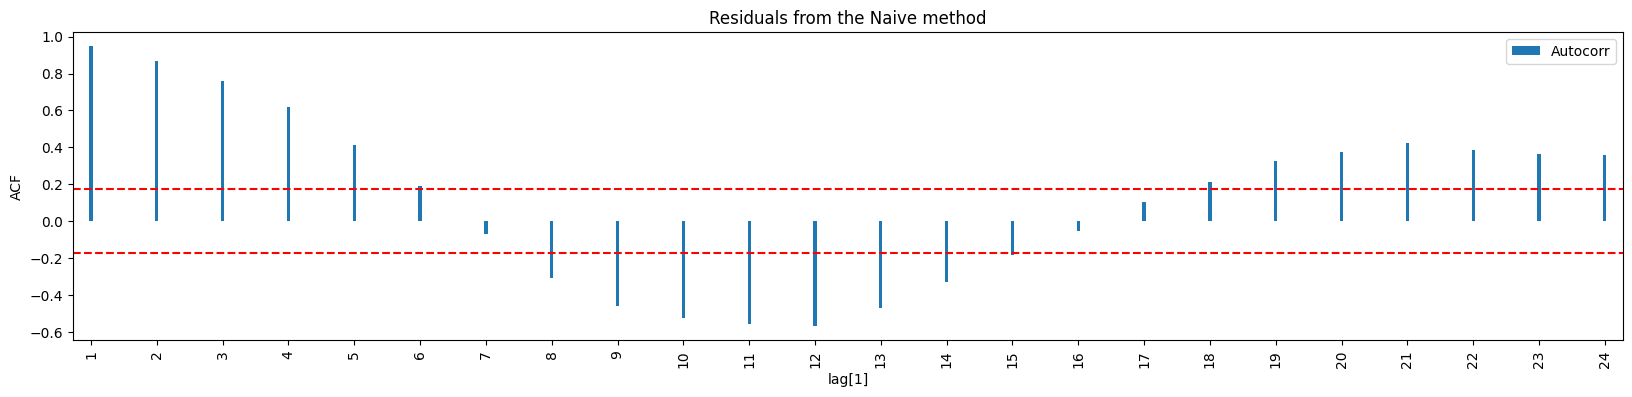

In [109]:
import math

ticker_data = augment_df["residuals"]
ticker_data_acf = [ticker_data.autocorr(i) for i in range(1,25)]

test_df = pd.DataFrame([ticker_data_acf]).T
test_df.columns = ['Autocorr']
test_df.index += 1
test_df.plot(kind='bar', width = 0.05, figsize = (20, 4))

# Statisfical significance.
n = len(augment_df['residuals'])
plt.axhline(y = 2/math.sqrt(n), color = 'r', linestyle = 'dashed')
plt.axhline(y = -2/math.sqrt(n), color = 'r', linestyle = 'dashed')

# Adding plot title.
plt.title("Residuals from the Naive method")

# Providing x-axis name.
plt.xlabel("lag[1]")

# Providing y-axis name.
plt.ylabel("ACF")

When we look at the ACF plot to see whether each spike is within the required limits, we are implicitly carrying out multiple hypothesis tests, each one with a small probability of giving a false positive. When enough of these tests are done, it is likely that at least one will give a false positive, and so we may conclude that the residuals have some remaining autocorrelation, when in fact they do not.

we test whether the first $ℓ$ autocorrelations are significantly different from what would be expected from a white noise process.

the **Ljung-Box test**, based on

\begin{gather*}
Q* = T (T + 2) \sum_{k = 1}^{ℓ} (T - k)^{-1} r^{2}_{k}
\end{gather*}

where $ℓ$ is the maximum lag being considered and $T$ is the number of observations. If each $r_{k}$ is close to zero, then $Q$ will be small. If some  $r_{k}$ values are large (positive or negative), then $Q$ will be large.

large values of $Q∗$ suggest that the autocorrelations do not come from a white noise series.



**model_df**

Number of degrees of freedom consumed by the model. In an ARMA model, this value is usually p+q where p is the AR order and q is the MA order. This value is subtracted from the degrees-of-freedom used in the test so that the adjusted dof for the statistics are lags - model_df. If lags - model_df <= 0, then NaN is returned.

In [110]:
import statsmodels

In [111]:
ljung_box = statsmodels.stats.diagnostic.acorr_ljungbox(test_df, lags=12, model_df=0)
ljung_box.tail(1)

,lb_stat,lb_pvalue
12,109.257977,8.388993e-18


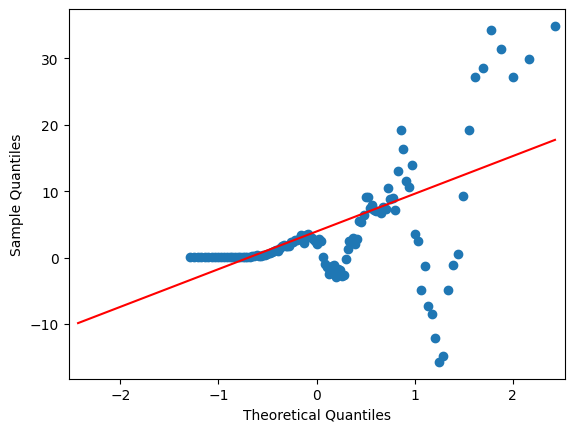

In [112]:
fig = statsmodels.api.qqplot(augment_df[['residuals']].values, line='q')
plt.show()

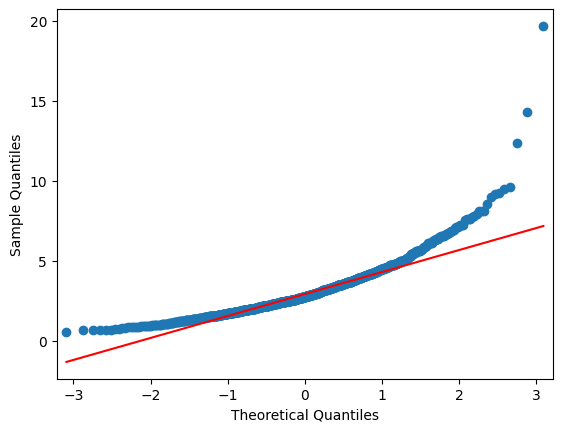

In [113]:
from scipy.stats import lognorm
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
fig = statsmodels.api.qqplot(lognorm_dataset, line='q')

plt.show()